In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset to Pandas DataFrame

df = pd.read_csv("winequality-red.csv",low_memory=False, sep=';')
df.shape

(1599, 12)

1. Data Pre-processing 
 -> checking for any missing value or null value

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

2. Data Analysis and Visualization 

In [4]:
#statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


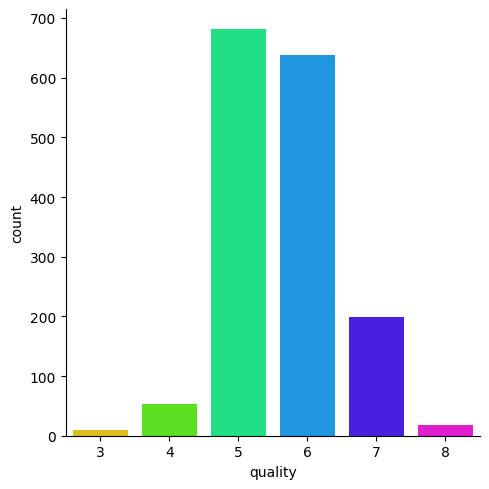

In [5]:
#Number of values of each quality
#for these we need the "seaborn" library

palatte=sns.color_palette("hsv",len(df["quality"].unique()))
sns.catplot(x="quality", data = df,kind="count",palette=palatte)

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

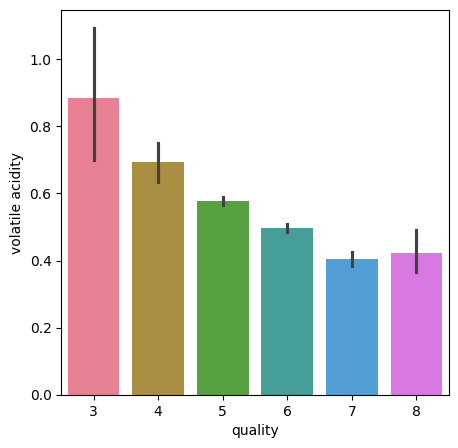

In [6]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
palatte=sns.color_palette("husl",len(df['quality'].unique()))
sns.barplot(x='quality',y='volatile acidity',data=df,palette=palatte)

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

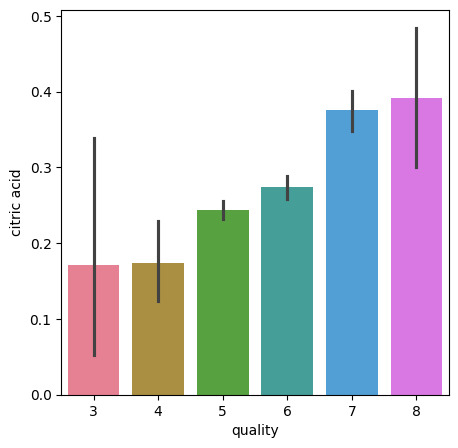

In [7]:
#citric acidity vs quality
plot = plt.figure(figsize=(5,5))
palatte=sns.color_palette("husl",len(df['quality'].unique()))
sns.barplot(x='quality',y='citric acid',data=df,palette=palatte)

1. Positive Correlation
2. Negative Correlation

In [8]:
correlation  = df.corr()

<AxesSubplot: >

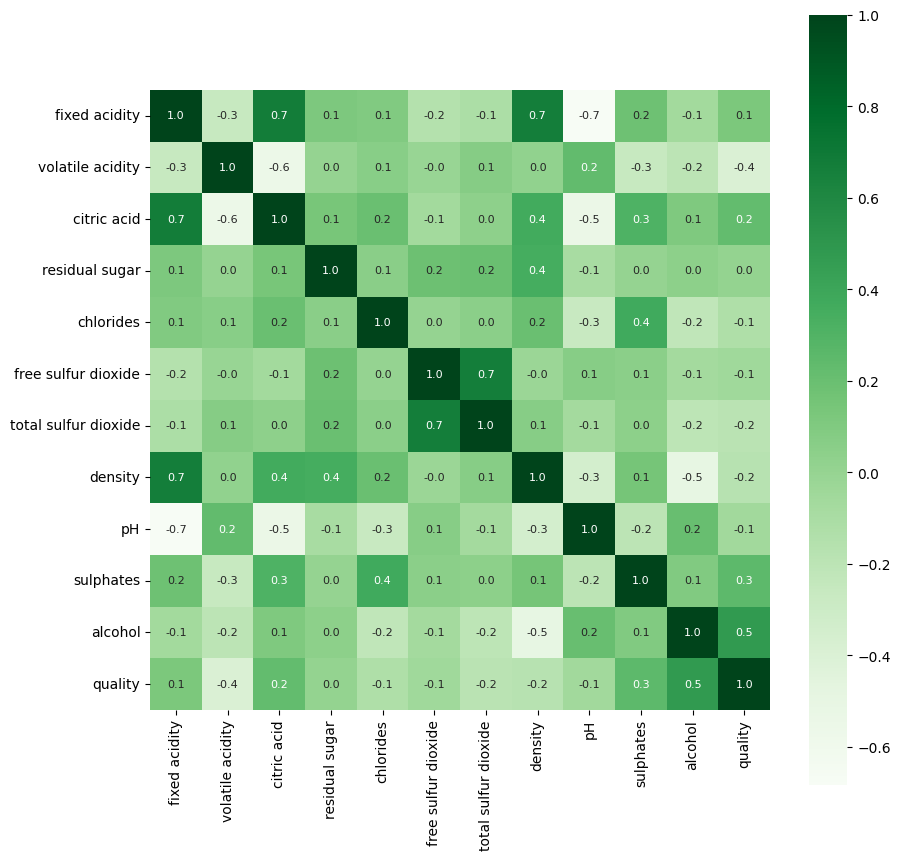

In [17]:
#constructing a heatmap to understand the correlation between 
#the columns 
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot = True,annot_kws={'size':8},cmap='Greens')

3. Data Pre-processing

In [10]:
# separte the data Label

X=df.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Label Binarization

In [11]:
Y = df['quality'].apply(lambda y_value:1 if y_value >=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

Train and Test Split

In [12]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Model Training Using Random Forest Classifier

In [13]:
model =  RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

    Model Evaluation

In [14]:
#accurecy on test data (20%) 

X_test_predic=model.predict(X_test)
#compare with original Y_test with predicted model

test_Data_accu=accuracy_score(X_test_predic,Y_test)
test_Data_accu #aprox 92% really good

0.925

Building a predicting system

In [15]:
data=(7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)
data_npar=np.asanyarray(data)
data_npar_re=data_npar.reshape(1,-1)
prediction = model.predict(data_npar_re)

if prediction[0] ==1 :
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")


Good Quality Wine


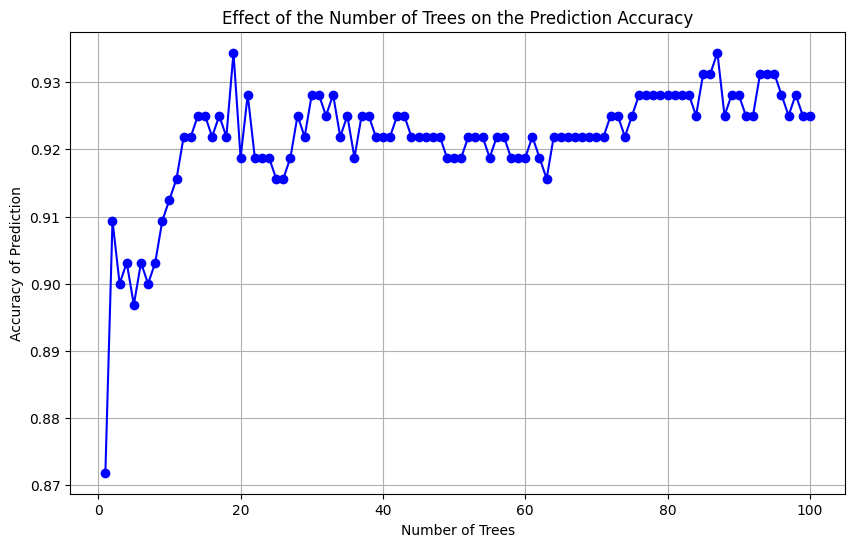

[0.871875, 0.909375, 0.9, 0.903125, 0.896875, 0.903125, 0.9, 0.903125, 0.909375, 0.9125, 0.915625, 0.921875, 0.921875, 0.925, 0.925, 0.921875, 0.925, 0.921875, 0.934375, 0.91875, 0.928125, 0.91875, 0.91875, 0.91875, 0.915625, 0.915625, 0.91875, 0.925, 0.921875, 0.928125, 0.928125, 0.925, 0.928125, 0.921875, 0.925, 0.91875, 0.925, 0.925, 0.921875, 0.921875, 0.921875, 0.925, 0.925, 0.921875, 0.921875, 0.921875, 0.921875, 0.921875, 0.91875, 0.91875, 0.91875, 0.921875, 0.921875, 0.921875, 0.91875, 0.921875, 0.921875, 0.91875, 0.91875, 0.91875, 0.921875, 0.91875, 0.915625, 0.921875, 0.921875, 0.921875, 0.921875, 0.921875, 0.921875, 0.921875, 0.921875, 0.925, 0.925, 0.921875, 0.925, 0.928125, 0.928125, 0.928125, 0.928125, 0.928125, 0.928125, 0.928125, 0.928125, 0.925, 0.93125, 0.93125, 0.934375, 0.925, 0.928125, 0.928125, 0.925, 0.925, 0.93125, 0.93125, 0.93125, 0.928125, 0.925, 0.928125, 0.925, 0.925]


In [16]:
n = 100
accuracy = [0] * n

for i in range(n):
    classifier = RandomForestClassifier(n_estimators=i + 1, random_state=2)
    classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_test)
    accuracy[i] = accuracy_score(Y_test, predictions)
plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), accuracy, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy of Prediction")
plt.title("Effect of the Number of Trees on the Prediction Accuracy")
plt.grid(True)
plt.show()

print(accuracy)